In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/datathon4.csv"
df = pd.read_csv(file_path)

In [3]:
print(df.shape)

(91713, 186)


In [4]:
values = [1]
df = df[df['hepatic_failure'].isin(values)]

In [5]:
print(df.shape)

(1182, 186)


In [6]:
 col = [
    'patient_id', 'd1_creatinine_max', 'd1_inr_max', 'd1_bilirubin_max', 'hospital_death']
df = df[col]

In [7]:
print(df.shape)

(1182, 5)


In [8]:
df.head()

,patient_id,d1_creatinine_max,d1_inr_max,d1_bilirubin_max,hospital_death
35,88655,1.10,NaN,NaN,0
49,453,0.96,1.1,0.5,0
103,67996,0.92,NaN,0.3,0
113,74973,1.03,1.4,1.8,0
138,50440,1.10,NaN,2.1,0


In [9]:
missing_values = df.isnull().sum()
print(missing_values)

patient_id             0
d1_creatinine_max     82
d1_inr_max           472
d1_bilirubin_max     383
hospital_death         0
dtype: int64


In [10]:
df_cleaned = df.dropna()
print(df_cleaned)

       patient_id  d1_creatinine_max  d1_inr_max  d1_bilirubin_max  \
49            453               0.96         1.1               0.5   
113         74973               1.03         1.4               1.8   
166        126497               4.05         1.7               4.4   
219         50738               1.50         1.3               1.4   
380         37528               1.49         1.5               3.2   
...           ...                ...         ...               ...   
90803       60919               0.89         1.1               0.6   
90902       97583               0.60         1.3               3.0   
90908       39296               4.50         3.0              17.3   
90962      119709               7.00         2.0               0.7   
91654      126853               0.40         1.7               2.4   

       hospital_death  
49                  0  
113                 0  
166                 0  
219                 0  
380                 0  
...            

In [11]:
description = df_cleaned.describe()
print(description)

          patient_id  d1_creatinine_max  d1_inr_max  d1_bilirubin_max  \
count     562.000000         562.000000  562.000000        562.000000   
mean    66715.185053           1.906671    2.109082          6.061762   
std     37609.907900           1.535341    1.064504          7.517492   
min       170.000000           0.340000    0.900000          0.200000   
25%     34423.500000           0.900000    1.400000          1.400000   
50%     67596.500000           1.355000    1.800000          3.400000   
75%     98608.750000           2.407500    2.425000          7.175000   
max    130350.000000          10.250000    7.756000         44.800000   

       hospital_death  
count      562.000000  
mean         0.229537  
std          0.420910  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          1.000000  


<ipython-input-12-1c3aebbfbc52>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['MELD'] = df_cleaned.apply(calculate_meld, axis=1)


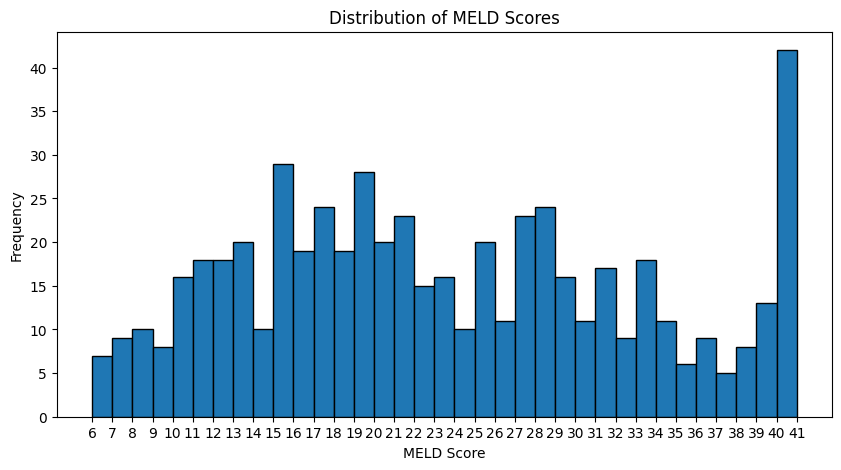

Descriptive Statistics for MELD Score:
 count    562.000000
mean      23.023132
std        9.547769
min        6.000000
25%       15.000000
50%       22.000000
75%       30.000000
max       40.000000
Name: MELD, dtype: float64


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the function to calculate the MELD score, cap it at 40, and round to the nearest whole number
def calculate_meld(row):
    meld_score = 3.78 * np.log(max(row['d1_bilirubin_max'], 1)) + \
                 11.2 * np.log(max(row['d1_inr_max'], 1)) + \
                 9.57 * np.log(max(row['d1_creatinine_max'], 1)) + 6.43
    meld_score_capped = min(meld_score, 40)
    return round(meld_score_capped)

df_cleaned['MELD'] = df_cleaned.apply(calculate_meld, axis=1)

# Descriptive statistics
meld_descriptive_stats = df_cleaned['MELD'].describe()

# Distribution plot
plt.figure(figsize=(10, 5))
df_cleaned['MELD'].hist(bins=range(int(df_cleaned['MELD'].min()), int(df_cleaned['MELD'].max()) + 2), edgecolor='black')
plt.xticks(range(int(df_cleaned['MELD'].min()), int(df_cleaned['MELD'].max()) + 2))
plt.title('Distribution of MELD Scores')
plt.xlabel('MELD Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


print("Descriptive Statistics for MELD Score:\n", meld_descriptive_stats)

In [13]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_cleaned[['MELD']]  # Predictor
y = df_cleaned['hospital_death']  # Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Coefficient for MELD score:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)


              precision    recall  f1-score   support

           0       0.83      0.92      0.87        85
           1       0.63      0.43      0.51        28

    accuracy                           0.80       113
   macro avg       0.73      0.67      0.69       113
weighted avg       0.78      0.80      0.78       113

[[78  7]
 [16 12]]
Coefficient for MELD score: [[0.11810944]]
Intercept: [-4.24935262]


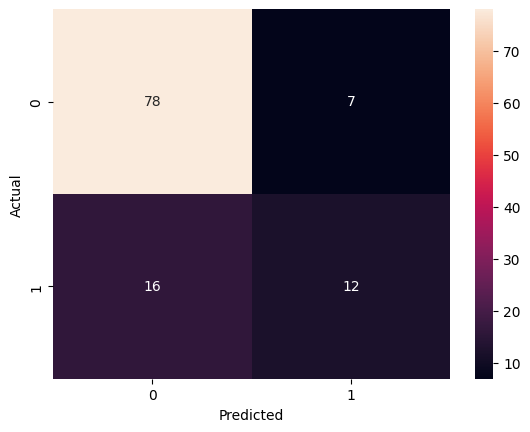

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
